<img src="https://www.unad.edu.co/images/footer/logo-unad-acreditacion-min.png" width="780" height="140" align="right"/>



 <p align="center"> Fase 3 - Componente práctico - Prácticas simuladas</p>

 <p align="center">  Presentado por: Sergio Andres Lopez Afanador</p>


In [4]:
import pandas as pd

# Especifica la ruta del archivo CSV
ruta_archivo = r"C:\Users\AIO\Documents\UNAD PRIMER SEMESTRE\CURSOS\MACHINE LEARNING\Actividades\Nueva carpeta\Anexo 2 - Predicción de la productividad de los empleados de la confección.csv"

# Carga los datos en un DataFrame de pandas
data = pd.read_csv(ruta_archivo)

# Acción 1: Aplicación modelos lineales.

- a. Seleccionar una base de entrenamiento (80%) y una base de prueba (20%).
- b. Con la base de entrenamiento aplicar un modelo de regresión lineal para predecir la productividad real a partir del número de trabajadores de cada equipo y el tiempo extra en minutos.
- c. Realizar las predicciones sobre la base de prueba.
- d. Con los resultados del ítem anterior, realizar un diagrama de dispersión, en el eje X ubicar los valores predichos y en el eje Y ubicar los valores de productividad real.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Dividir los datos en base de entrenamiento y base de prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(data[['no_of_workers', 'over_time']], data['actual_productivity'], test_size=0.2, random_state=42)


In [6]:
# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con la base de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en la base de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE) en la base de prueba
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE) en la base de prueba:", mse)

Error cuadrático medio (MSE) en la base de prueba: 0.026616567260178005


In [7]:
# Realizar predicciones sobre la base de prueba
y_pred_test = model.predict(X_test)

# Mostrar las primeras 5 predicciones
print("Predicciones sobre la base de prueba:")
print(y_pred_test[:5])


Predicciones sobre la base de prueba:
[0.72911833 0.73355348 0.74454834 0.74507799 0.74507799]


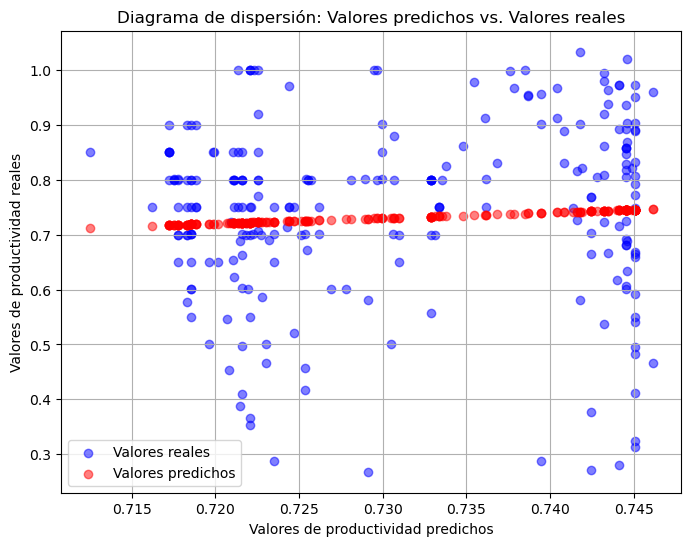

In [9]:
import matplotlib.pyplot as plt

# Crear el diagrama de dispersión con colores diferentes
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_test, y_test, color='blue', alpha=0.5, label='Valores reales')  # Valores reales en azul
plt.scatter(y_pred_test, y_pred_test, color='red', alpha=0.5, label='Valores predichos')  # Valores predichos en rojo
plt.title('Diagrama de dispersión: Valores predichos vs. Valores reales')
plt.xlabel('Valores de productividad predichos')
plt.ylabel('Valores de productividad reales')
plt.legend()
plt.grid(True)
plt.show()



# Acción 2: Aplicación modelo logístico.

- a. Construir la variable ‘nivel_productividad’ con niveles alto y bajo. Considere nivel alto a productividad real > 0.7 y nivel bajo a productividad real <=0.7.
- b. Con la base de entrenamiento aplicar un modelo de regresión logística para predecir el ‘nivel_productividad’ basado en el número de trabajadores de cada equipo y el tiempo extra en minutos.
- c. Realizar las predicciones sobre la base de prueba. Calcule la precisión (accuracy) sobre los datos de prueba.

In [12]:
import pandas as pd

# Definir una función para asignar niveles de productividad
def asignar_nivel(productividad):
    if productividad > 0.7:
        return 'Alto'
    else:
        return 'Bajo'

# Aplicar la función a la columna 'actual_productivity' para crear la nueva variable 'nivel_productividad'
data['nivel_productividad'] = data['actual_productivity'].apply(asignar_nivel)

# Mostrar las primeras filas del DataFrame con la nueva variable
print(data.head())


       date   quarter  department       day  team  targeted_productivity  \
0  1/1/2015  Quarter1      sweing  Thursday     8                   0.80   
1  1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
2  1/1/2015  Quarter1      sweing  Thursday    11                   0.80   
3  1/1/2015  Quarter1      sweing  Thursday    12                   0.80   
4  1/1/2015  Quarter1      sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity nivel_productividad  
0                   0           59.0             0.940725                Alto  
1   

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Supongamos que 'data' es el DataFrame ya cargado con tus datos

# Paso a: Crear la variable ‘nivel_productividad’ ya hecho previamente
def asignar_nivel(productividad):
    if productividad > 0.7:
        return 'Alto'
    else:
        return 'Bajo'

data['nivel_productividad'] = data['actual_productivity'].apply(asignar_nivel)

# Separar en características y variable objetivo
X = data[['no_of_workers', 'over_time']]
y = data['nivel_productividad']

# Codificar la variable objetivo (nivel_productividad) de categorías a valores numéricos
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Separar en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión logística
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Mostrar los coeficientes del modelo
print("Coeficientes del modelo:", log_reg.coef_)
print("Intercepto del modelo:", log_reg.intercept_)


Coeficientes del modelo: [[-1.15149573e-02  2.18453537e-05]]
Intercepto del modelo: [-0.51955908]


In [14]:
from sklearn.metrics import accuracy_score

# Realizar predicciones sobre la base de prueba
y_pred = log_reg.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo sobre los datos de prueba:", accuracy)


Precisión del modelo sobre los datos de prueba: 0.7083333333333334


# Acción 3: Aplicación K-NN.

- a. Con la base de entrenamiento, aplicar un modelo KNN de aprendizaje automático que pueda aprender del número de trabajadores de cada equipo y el tiempo extra en minutos, para predecir “nivel_productividad”.
- b. Realizar las predicciones sobre la base de prueba. Calcule la precisión (accuracy) sobre los datos de prueba.

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



# Definir una función para asignar niveles de productividad
def asignar_nivel(productividad):
    if productividad > 0.7:
        return 'Alto'
    else:
        return 'Bajo'

# Aplicar la función a la columna 'actual_productivity' para crear la nueva variable 'nivel_productividad'
data['nivel_productividad'] = data['actual_productivity'].apply(asignar_nivel)

# Seleccionar características y etiquetas
X = data[['no_of_workers', 'over_time']]
y = data['nivel_productividad']

# Dividir los datos en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar el número de vecinos (k)
knn.fit(X_train, y_train)



KNeighborsClassifier()

In [22]:
# Realizar predicciones sobre la base de prueba
y_pred = knn.predict(X_test)

# Calcular la precisión (accuracy) sobre los datos de prueba
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo KNN: {accuracy:.2f}')


Precisión del modelo KNN: 0.65


# Acción 4: Aplicación Árboles de decisión (CART).

- a. Con la base de entrenamiento, aplicar un modelo de árboles de decisión para distinguir “nivel_productividad” bajo y alto usando todas las características.
- b. Usando la función graphviz() visualizar el diagrama de árbol.
- c. Realizar las predicciones sobre la base de prueba. Calcule la precisión (accuracy) sobre los datos de prueba.

In [25]:
import pandas as pd

# Especifica la ruta del archivo CSV
ruta_archivo = r"C:\Users\AIO\Documents\UNAD PRIMER SEMESTRE\CURSOS\MACHINE LEARNING\Actividades\Nueva carpeta\Anexo 2 - Predicción de la productividad de los empleados de la confección.csv"

# Carga los datos en un DataFrame de pandas
data = pd.read_csv(ruta_archivo)

In [26]:

# Visualizar las primeras filas del DataFrame para entender la estructura de los datos
print(data.head())

       date   quarter  department       day  team  targeted_productivity  \
0  1/1/2015  Quarter1      sweing  Thursday     8                   0.80   
1  1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
2  1/1/2015  Quarter1      sweing  Thursday    11                   0.80   
3  1/1/2015  Quarter1      sweing  Thursday    12                   0.80   
4  1/1/2015  Quarter1      sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0        

In [28]:
print(data.columns)


Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')


In [29]:
# Definir una función para asignar niveles de productividad
def asignar_nivel(productividad):
    if productividad > 0.7:
        return 'Alto'
    else:
        return 'Bajo'

# Aplicar la función para crear la variable 'nivel_productividad'
data['nivel_productividad'] = data['actual_productivity'].apply(asignar_nivel)

# Ahora podemos proceder con el entrenamiento del modelo utilizando la columna 'nivel_productividad' recién creada como nuestra variable objetivo


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Seleccionar características y etiquetas
X = data.drop(['date', 'quarter', 'department', 'day', 'team', 'nivel_productividad'], axis=1)
y = data['nivel_productividad']

# Dividir los datos en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de árbol de decisiones
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de entrenamiento
y_pred_train = tree_classifier.predict(X_train)

# Evaluar el modelo en el conjunto de entrenamiento
print("Reporte de clasificación en el conjunto de entrenamiento:")
print(classification_report(y_train, y_pred_train))

# Realizar predicciones sobre el conjunto de prueba
y_pred_test = tree_classifier.predict(X_test)

# Evaluar el modelo en el conjunto de prueba
print("\nReporte de clasificación en el conjunto de prueba:")
print(classification_report(y_test, y_pred_test))


Reporte de clasificación en el conjunto de entrenamiento:
              precision    recall  f1-score   support

        Alto       1.00      1.00      1.00       661
        Bajo       1.00      1.00      1.00       296

    accuracy                           1.00       957
   macro avg       1.00      1.00      1.00       957
weighted avg       1.00      1.00      1.00       957


Reporte de clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

        Alto       1.00      1.00      1.00       170
        Bajo       1.00      1.00      1.00        70

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



In [31]:
from sklearn.tree import export_graphviz
import graphviz

# Exportar el árbol de decisiones a un archivo .dot
dot_data = export_graphviz(tree_classifier, out_file=None, 
                           feature_names=X.columns,  
                           class_names=tree_classifier.classes_,  
                           filled=True, rounded=True,  
                           special_characters=True)  

# Renderizar el archivo .dot en un árbol de decisiones utilizando Graphviz
graph = graphviz.Source(dot_data)  

# Mostrar el árbol de decisiones
graph.render('decision_tree')  # Esto guarda el diagrama en un archivo decision_tree.pdf


'decision_tree.pdf'

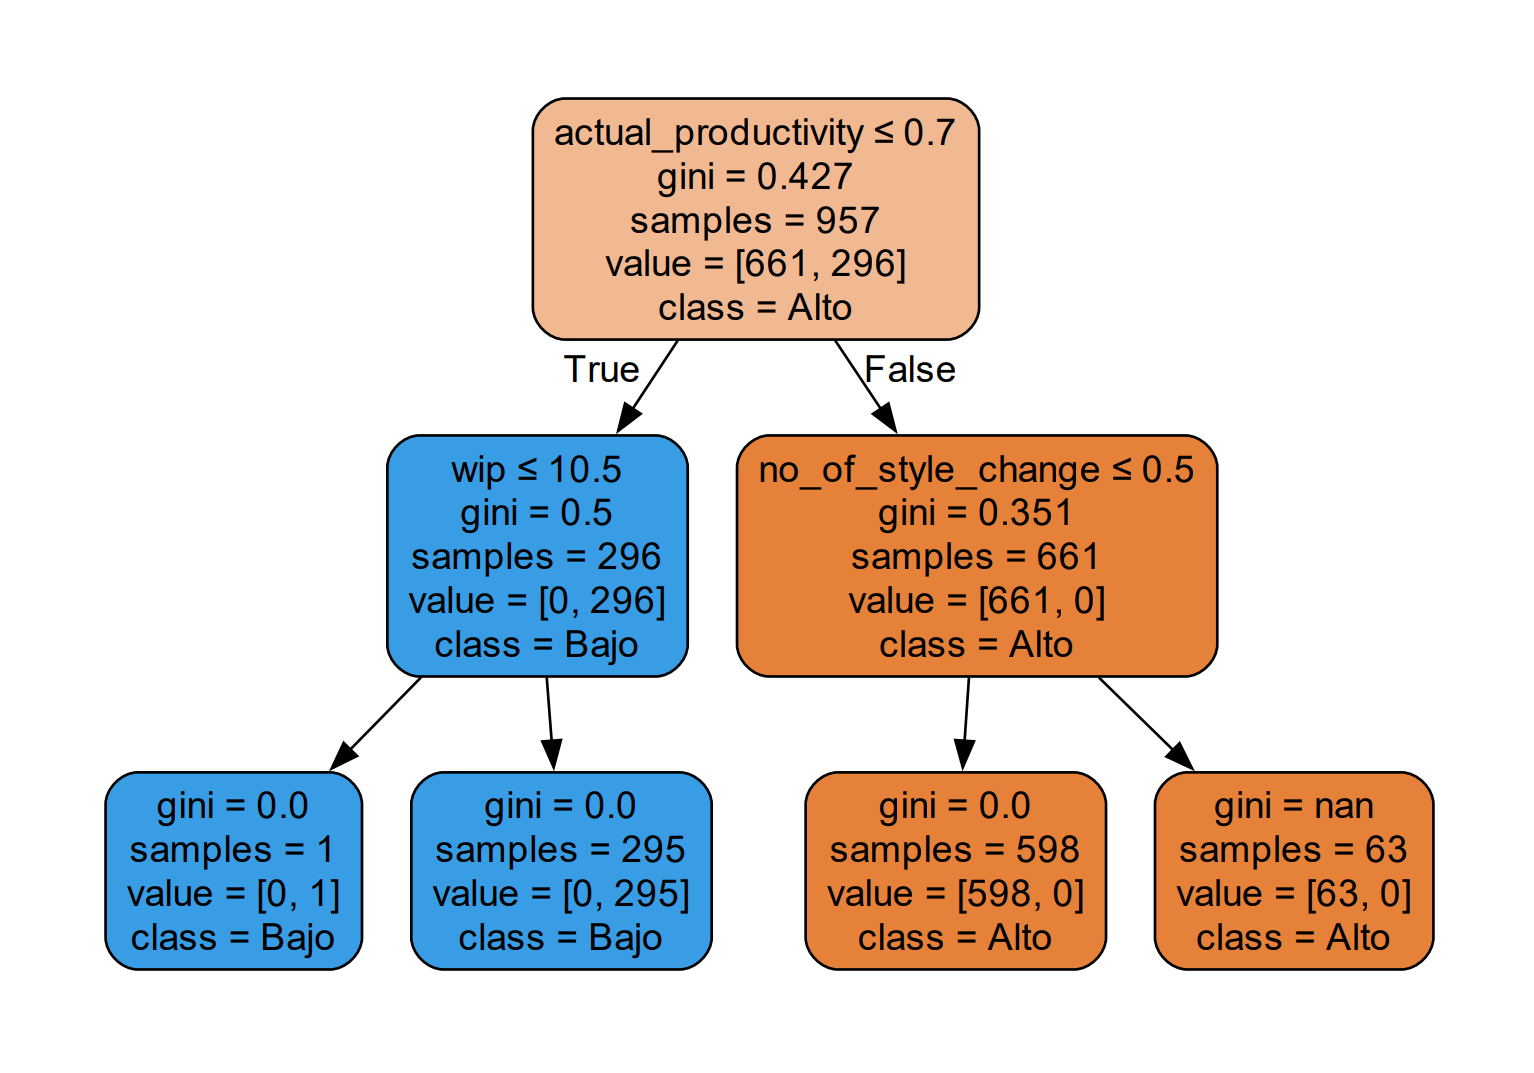


In [36]:
from sklearn.metrics import accuracy_score

# Realizar predicciones sobre el conjunto de prueba
y_pred_test = tree_classifier.predict(X_test)

# Calcular la precisión del modelo sobre los datos de prueba
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Precisión del modelo en el conjunto de prueba: {accuracy_test:.2f}')


Precisión del modelo en el conjunto de prueba: 1.00
